In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = np.genfromtxt('../data/data_yerr.dat', names=True, comments='#', delimiter='&')
data

array([( 1., 201., 592., 61.), ( 2., 244., 401., 25.),
       ( 3.,  47., 583., 38.), ( 4., 287., 402., 15.),
       ( 5., 203., 495., 21.), ( 6.,  58., 173., 15.),
       ( 7., 210., 479., 27.), ( 8., 202., 504., 14.),
       ( 9., 198., 510., 30.), (10., 158., 416., 16.),
       (11., 165., 393., 14.), (12., 201., 442., 25.),
       (13., 157., 317., 52.), (14., 131., 311., 16.),
       (15., 166., 400., 34.), (16., 160., 337., 31.),
       (17., 186., 423., 42.), (18., 125., 334., 26.),
       (19., 218., 533., 16.), (20., 146., 344., 22.)],
      dtype=[('index', '<f8'), ('x', '<f8'), ('y', '<f8'), ('sigm_y', '<f8')])

In [7]:
x = data['x']  
y = data['y']
N = len(x)
sigma = 1.0  # Assumed known error

In [8]:
def likelihood(m, b):
    return -0.5 * np.sum(((y - (m * x + b)) ** 2) / sigma ** 2)

C:\Users\rabin\AppData\Local\Temp\ipykernel_14964\3267149730.py:31: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)


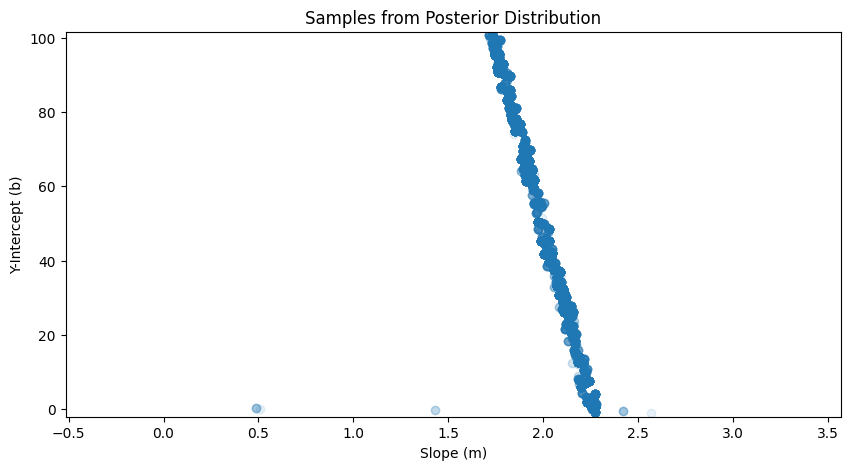

In [17]:
# Metropolis algorithm for 2D parameters
def metropolis_2d(n_samples, initial_m, initial_b):
    samples = []
    m_current = initial_m
    b_current = initial_b

    for _ in range(n_samples):
        # Propose new values for m and b
        m_proposed = np.random.normal(m_current, 0.5)  # Change proposal width as needed
        b_proposed = np.random.normal(b_current, 0.5)

        # Calculate log-likelihood for current and proposed values
        log_likelihood_current = log_likelihood(m_current, b_current)
        log_likelihood_proposed = log_likelihood(m_proposed, b_proposed)

        # Calculate acceptance ratio using log-likelihoods
        acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)

        # Accept or reject the new values
        if np.random.rand() < acceptance_ratio:
            m_current, b_current = m_proposed, b_proposed

        samples.append((m_current, b_current))

    return np.array(samples)

# Run the Metropolis algorithm
samples = metropolis_2d(n_samples=10000, initial_m=0, initial_b=0)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)
plt.title('Samples from Posterior Distribution')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')
plt.xlim(np.min(samples[:, 0]) - 1, np.max(samples[:, 0]) + 1)
plt.ylim(np.min(samples[:, 1]) - 1, np.max(samples[:, 1]) + 1)
plt.show()


C:\Users\rabin\AppData\Local\Temp\ipykernel_14964\2602754008.py:17: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)


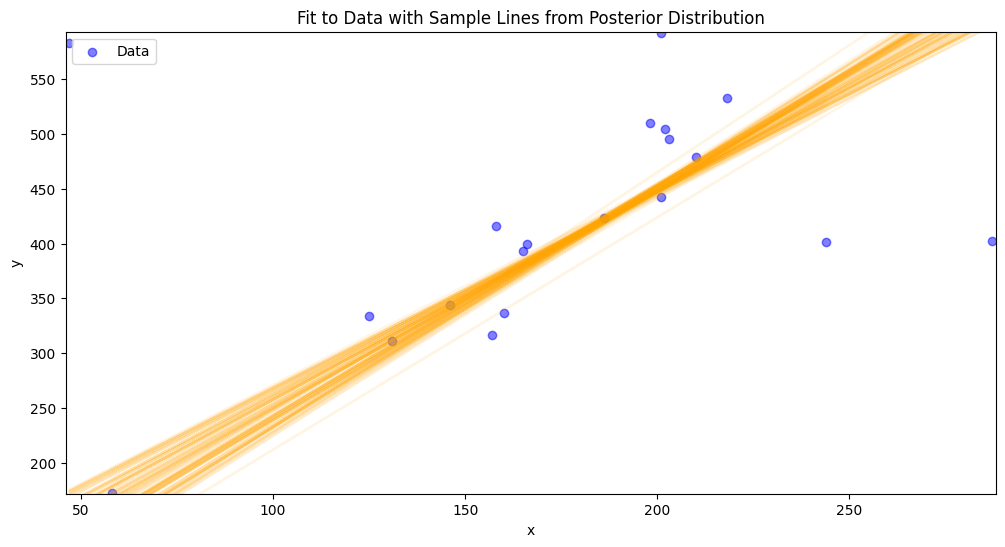

In [21]:
# Metropolis algorithm for 2D parameters
def metropolis_2d(n_samples, initial_m, initial_b):
    samples = []
    m_current = initial_m
    b_current = initial_b

    for _ in range(n_samples):
        # Propose new values for m and b
        m_proposed = np.random.normal(m_current, 0.5)  # Change proposal width as needed
        b_proposed = np.random.normal(b_current, 0.5)

        # Calculate log-likelihood for current and proposed values
        log_likelihood_current = log_likelihood(m_current, b_current)
        log_likelihood_proposed = log_likelihood(m_proposed, b_proposed)

        # Calculate acceptance ratio using log-likelihoods
        acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)

        # Accept or reject the new values
        if np.random.rand() < acceptance_ratio:
            m_current, b_current = m_proposed, b_proposed

        samples.append((m_current, b_current))

    return np.array(samples)

# Run the Metropolis algorithm
samples = metropolis_2d(n_samples=10000, initial_m=0, initial_b=0)

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data', alpha=0.5)

# Plot several lines from the samples
num_lines = 100  # Number of lines to plot
for i in range(num_lines):
    m_sample, b_sample = samples[np.random.randint(0, len(samples))]
    plt.plot(x, m_sample * x + b_sample, color='orange', alpha=0.1)

# Labels and title
plt.title('Fit to Data with Sample Lines from Posterior Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.legend()
plt.show()


C:\Users\rabin\AppData\Local\Temp\ipykernel_14964\2639948166.py:26: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)


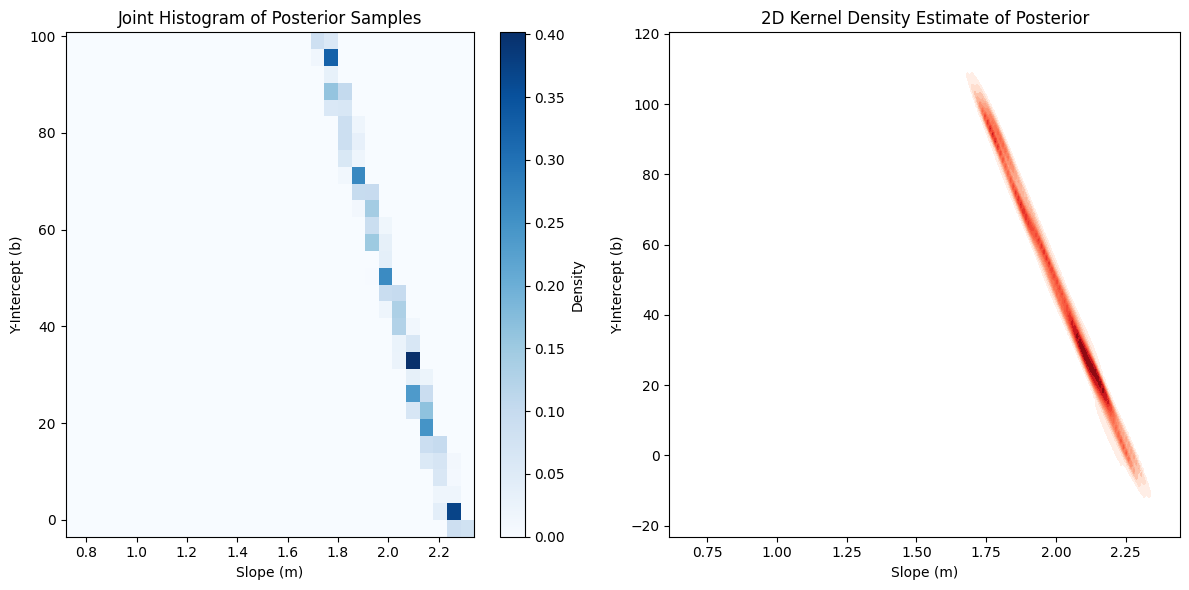

In [19]:
# Metropolis algorithm for 2D parameters
def metropolis_2d(n_samples, initial_m, initial_b):
    samples = []
    m_current = initial_m
    b_current = initial_b

    for _ in range(n_samples):
        # Propose new values for m and b
        m_proposed = np.random.normal(m_current, 0.5)
        b_proposed = np.random.normal(b_current, 0.5)

        # Calculate log-likelihood for current and proposed values
        log_likelihood_current = log_likelihood(m_current, b_current)
        log_likelihood_proposed = log_likelihood(m_proposed, b_proposed)

        # Calculate acceptance ratio using log-likelihoods
        acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)

        # Accept or reject the new values
        if np.random.rand() < acceptance_ratio:
            m_current, b_current = m_proposed, b_proposed

        samples.append((m_current, b_current))

    return np.array(samples)

# Run the Metropolis algorithm
samples = metropolis_2d(n_samples=10000, initial_m=0, initial_b=0)

# Plotting the 2D posterior distribution using seaborn
plt.figure(figsize=(12, 6))

# Joint histogram
plt.subplot(1, 2, 1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.title('Joint Histogram of Posterior Samples')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')

# Contour plot
plt.subplot(1, 2, 2)
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap='Reds', fill=True, levels=15)
plt.title('2D Kernel Density Estimate of Posterior')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')

plt.tight_layout()
plt.show()


Q1.

In [23]:
df = pd.read_csv('../data/gaiadr3_solar_neighborhood.csv')
df

,mg,bp_rp,parallax
0,10.390250,2.731872,10.000008
1,8.608481,2.025819,10.000029
2,4.267759,0.880858,10.000032
3,10.506658,2.649735,10.000066
4,12.077941,2.940875,10.000111
...,...,...,...
227624,11.758283,2.834036,336.026602
227625,9.521769,2.215609,392.752945
227626,14.129570,4.184836,415.179416
227627,11.883816,2.833697,546.975940


In [26]:
filtered_data = df[df['parallax'] > 40]
color = filtered_data['mg']  # Replace with actual column name for color
brightness = filtered_data['brightness']  # Replace with actual column name for brightness

# Define the log-likelihood function for linear model
def log_likelihood(m, b):
    return -0.5 * np.sum(((brightness - (m * color + b)) ** 2) / (1.0 ** 2))  # Assuming known error of 1.0

# Metropolis algorithm for 2D parameters
def metropolis_2d(n_samples, initial_m, initial_b):
    samples = []
    m_current = initial_m
    b_current = initial_b

    for _ in range(n_samples):
        # Propose new values for m and b
        m_proposed = np.random.normal(m_current, 0.1)  # Adjust proposal width as needed
        b_proposed = np.random.normal(b_current, 0.1)

        # Calculate log-likelihood for current and proposed values
        log_likelihood_current = log_likelihood(m_current, b_current)
        log_likelihood_proposed = log_likelihood(m_proposed, b_proposed)

        # Calculate acceptance ratio using log-likelihoods
        acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)

        # Accept or reject the new values
        if np.random.rand() < acceptance_ratio:
            m_current, b_current = m_proposed, b_proposed

        samples.append((m_current, b_current))

    return np.array(samples)

# Run the Metropolis algorithm
samples = metropolis_2d(n_samples=10000, initial_m=0, initial_b=0)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(color, brightness, color='blue', label='Data', alpha=0.5)

# Plot several lines from the samples
num_lines = 100  # Number of lines to plot
for i in range(num_lines):
    m_sample, b_sample = samples[np.random.randint(0, len(samples))]
    plt.plot(color, m_sample * color + b_sample, color='orange', alpha=0.1)

# Labels and title
plt.title('Fit to Color and Brightness of Nearby Main Sequence Stars')
plt.xlabel('Color')
plt.ylabel('Brightness')
plt.xlim(np.min(color) - 1, np.max(color) + 1)
plt.ylim(np.min(brightness) - 1, np.max(brightness) + 1)
plt.legend()
plt.show()

# 2D posterior distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.title('Joint Histogram of Posterior Samples')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')

plt.subplot(1, 2, 2)
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap='Reds', fill=True, levels=15)
plt.title('2D Kernel Density Estimate of Posterior')
plt.xlabel('Slope (m)')
plt.ylabel('Y-Intercept (b)')

plt.tight_layout()
plt.show()


KeyError: 'brightness'